In [2]:
# Importing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_test.csv")
train = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_features_train.csv")
labels = pd.read_csv("/Users/Cory/Desktop/Predicting_Disease_Spread/Data/dengue_labels_train.csv")

#Merge

df = pd.merge(train, labels, on = ["city", "year", "weekofyear"])

#Convert city to dummy

mapping = {'sj': 0, 'iq': 1}
df = df.replace(mapping)

#Interpolate

df = df.interpolate(how = "linear")

#To Date Time

import datetime
df['date'] = df['week_start_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

#Week columns to Datetime

from datetime import date
df['month'] = df['date'].dt.month

# Convert City to Dummy

mapping = {'sj': 0, 'iq': 1}
train2 = train.replace(mapping)

df.dtypes

# Split Train and Test

#Create Y

y = df.loc[:, ['total_cases']]
y.head(3)

#Features List

features=[
'city',
 'year',
 'weekofyear',
     'month',
 #'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 #'total_cases',
 #'date',
]

#Create X

X = df.loc[:, features]
X.head(3)

from sklearn.model_selection import train_test_split, GridSearchCV
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

# Decision Tree Classifier

In [3]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(random_state=1)

#Fit the model
dt.fit(X_train, y_train)

#Make predictions
y_pred = dt.predict(X_test)

In [5]:
# Import accuracy_score
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print('mean absolute error: ', MAE)

mean absolute error:  14.808219178082192


# Graphing Predicted Vs Actual

In [204]:
result = pd.DataFrame(y_pred, index= y_test.index)
result.columns = ['y_pred']
date = pd.DataFrame(df.week_start_date, index=y_test.index)

In [205]:
result2 = pd.merge(result, y_test, right_index=True, left_index=True)
result3 = pd.merge(result2, X_test, right_index=True, left_index=True)
result4 = pd.merge(result3, date, right_index=True, left_index=True)
result4['date'] = result4['week_start_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))


In [206]:
result4.head(3)

,y_pred,total_cases,city,year,weekofyear,month,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,week_start_date,date
666,3,6,0,2003,8,2,0.001500,-0.03445,0.161429,0.158486,...,0.0,15.370000,2.657143,25.585714,7.057143,30.6,20.6,7.4,2003-02-19,2003-02-19
633,3,2,0,2002,27,7,-0.009667,0.00650,0.207243,0.164929,...,2.3,17.398571,2.328571,28.342857,6.200000,31.7,25.0,3.6,2002-07-02,2002-07-02
161,4,19,0,1993,22,6,0.003050,0.05060,0.198186,0.176100,...,62.2,17.951429,1.914286,27.642857,5.885714,31.1,22.8,58.3,1993-06-04,1993-06-04


In [207]:
result4 = result4.set_index("date")
series1 = result4["y_pred"].squeeze()
series2 = result4["total_cases"].squeeze()

In [208]:
series1= series1.sort_index(ascending=True)
series2= series2.sort_index(ascending=True)

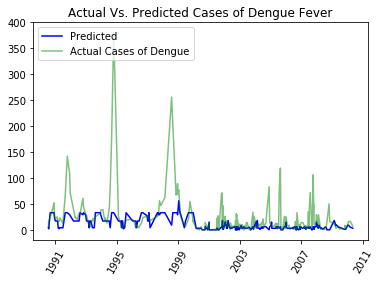

In [210]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
# Plot the aapl time series in blue
plt.plot(series1, color='blue', label='Predicted')

# Plot the ibm time series in green
plt.plot(series2, color='green', label='Actual Cases of Dengue', alpha = 0.5)

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

plt.title("Actual Vs. Predicted Cases of Dengue Fever")

# Display the plot
plt.show()